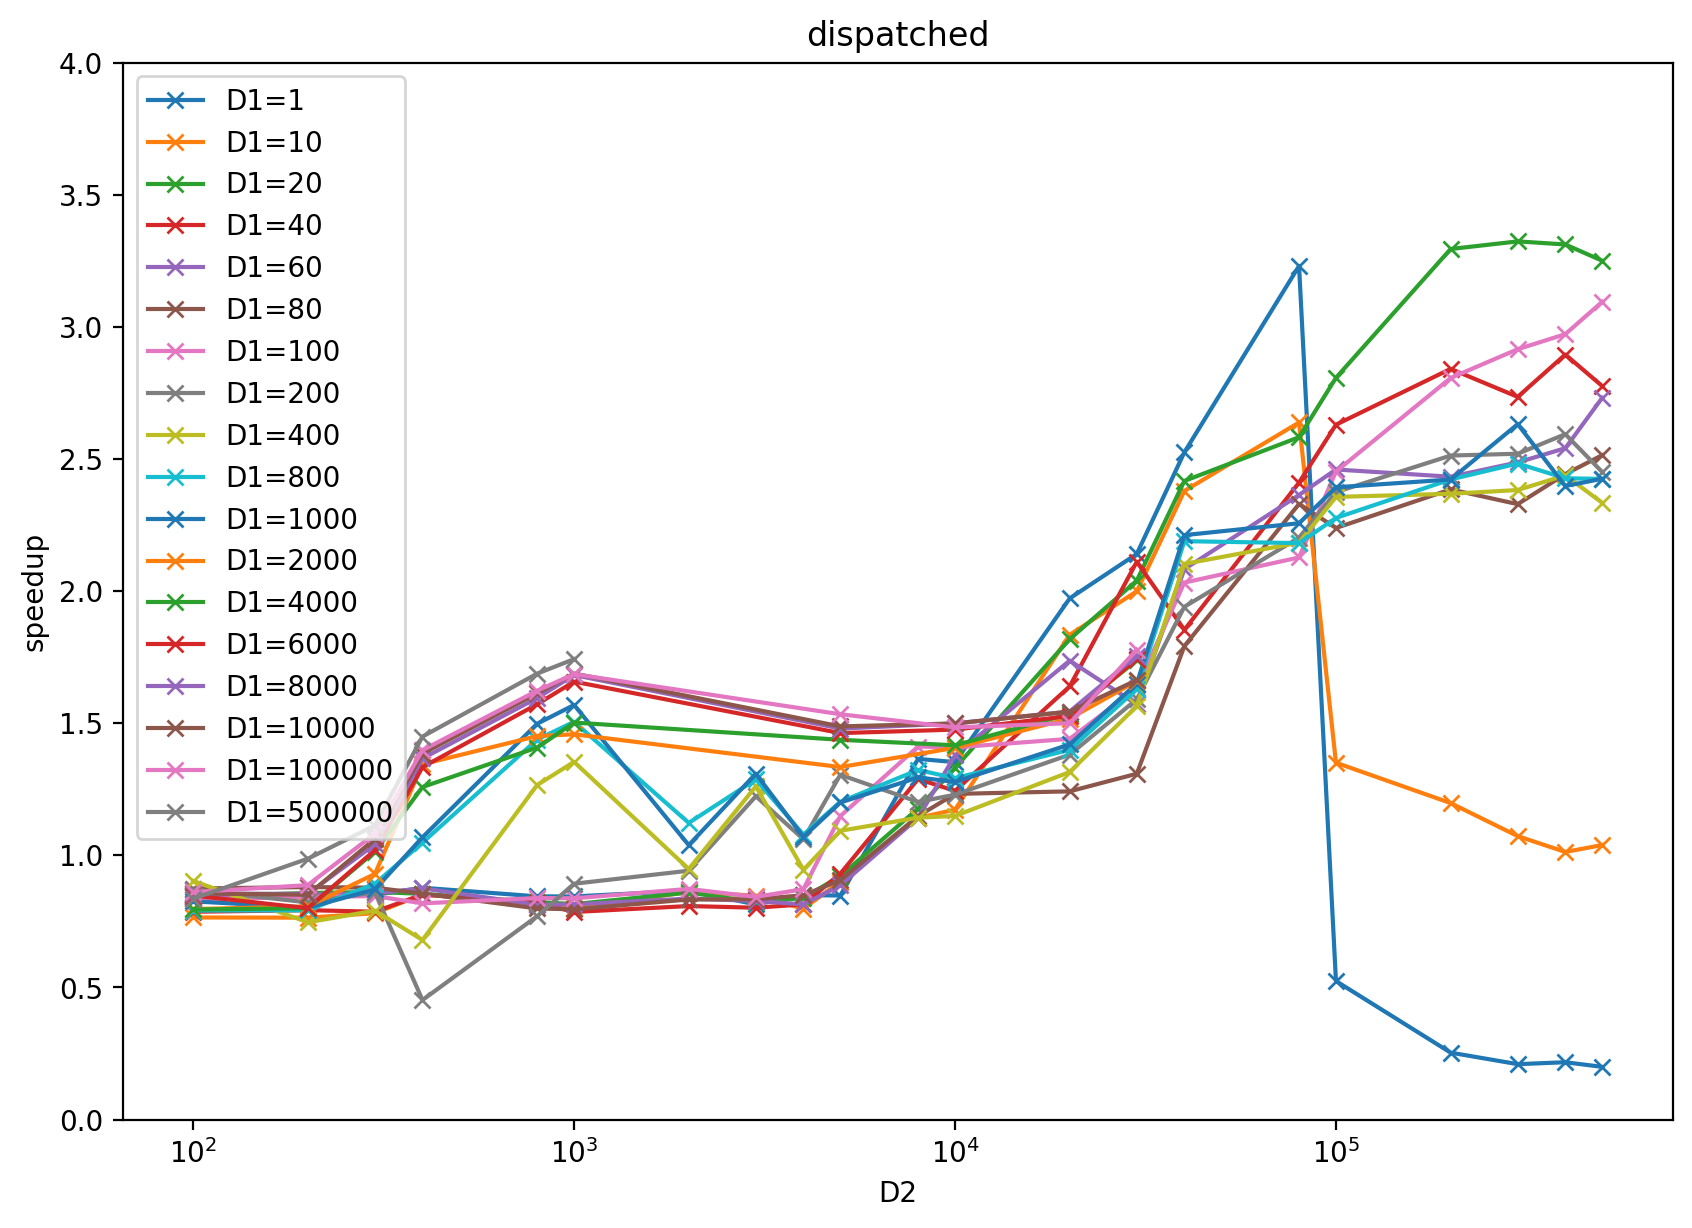

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import subprocess
import os

for file in ['dispatched']:
    df1 = pd.read_csv('benchmark_sb.csv')
    df2 = pd.read_csv(f'benchmark_{file}.csv')
    df1.loc[df1['time(ms)'] == -1, 'time(ms)'] = np.nan
    df2.loc[df2['time(ms)'] == -1, 'time(ms)'] = np.nan
    df1['speedup'] = df1['time(ms)'] / df2['time(ms)']
    
    
    D1s = df1.D1.unique()
    plt.figure(figsize=(10, 7), dpi=200)
    for D1 in D1s:
        tdf = df1[df1.D1 == D1]
        plt.plot(tdf.D2, tdf.speedup, label=f'D1={D1}', marker='x')
    plt.xlabel('D2')
    plt.ylabel('speedup')
    plt.ylim(0, 4)
    plt.xscale('symlog')
    plt.legend()
    plt.title(file)
    dir = 'benchmark'
    if not os.path.exists(dir):
        os.makedirs(dir)
    imgfilename = f"plot_{file}.png"
    plt.savefig(imgfilename, dpi=200, bbox_inches='tight')